<a href="https://colab.research.google.com/github/Anujjadaun97/Life-Expectancy-Prediction/blob/main/Life_expectancy_Regression_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization


from warnings import filterwarnings
filterwarnings('ignore')

Read dataset into DataFrame

In [2]:
life_data=pd.read_csv('/content/Life_Exp.csv')
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Features of Data

In [3]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Exploratory Data Analysis

In [4]:
#shape of data
life_data.shape

(2938, 22)

In [5]:
#Statistical Info for Numerical Features
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
#null detection in data
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#checking null
life_data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
cols = life_data.select_dtypes(include=['float64', 'int64']).columns

for i in cols:
    print(i, life_data[i].value_counts())
    print('-----------------------------------')

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
717.0     1
723.0     1
715.0     1
686.0     1
665.0     1
Name: count, Length: 425, dtype: int64
-----------------------------------
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
89       1
91       1
100      1
106      1
110      1
Name: count, Length: 209, dtype: int64
-----------------------------------
Alcohol Alcohol
0.01     288
0.03      15
0

In [9]:
life_data['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [10]:
life_data['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


**Data Cleaning**

In [11]:
#handling missing values
life_data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


As the number of Missing Values is large I will use Imputing Method to fill null values with mean Value

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

life_data['Life expectancy ']=imputer.fit_transform(life_data[['Life expectancy ']])
life_data['Adult Mortality']=imputer.fit_transform(life_data[['Adult Mortality']])
life_data['Alcohol']=imputer.fit_transform(life_data[['Alcohol']])
life_data['Hepatitis B']=imputer.fit_transform(life_data[['Hepatitis B']])
life_data[' BMI ']=imputer.fit_transform(life_data[[' BMI ']])
life_data['Polio']=imputer.fit_transform(life_data[['Polio']])
life_data['Total expenditure']=imputer.fit_transform(life_data[['Total expenditure']])
life_data['Diphtheria ']=imputer.fit_transform(life_data[['Diphtheria ']])
life_data['GDP']=imputer.fit_transform(life_data[['GDP']])
life_data['Population']=imputer.fit_transform(life_data[['Population']])
life_data[' thinness  1-19 years']=imputer.fit_transform(life_data[[' thinness  1-19 years']])
life_data[' thinness 5-9 years']=imputer.fit_transform(life_data[[' thinness 5-9 years']])
life_data['Income composition of resources']=imputer.fit_transform(life_data[['Income composition of resources']])
life_data['Schooling']=imputer.fit_transform(life_data[['Schooling']])

In [13]:
life_data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


**Handling Outliers**

First I will draw boxplot to check outliers

In [14]:
# Loop through each column and create a box plot
for column in life_data.columns:
    fig = px.box(life_data, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

Second, dealing with outliers

In [15]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = life_data[col_name].quantile(0.25)
    q3 = life_data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    life_data[col_name] = np.where((life_data[col_name] > upper_bound) | (life_data[col_name] < lower_bound), np.mean(life_data[col_name]), life_data[col_name])

Thirdly I will draw boxplot to check outliers after handling it

In [16]:
for column in life_data.columns:
    fig = px.box(life_data, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

**Data Visualization**

In [17]:
#using plotly draw count plot for df['Year']
fig = px.histogram(life_data, x='Year', color='Year', title='Count Plot for Year')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year</b>', x=0.5)
)

fig.show()

In [18]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(life_data.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

In [19]:
#using plotly draw count plot for df['Status'] and color each bar with different color
fig = px.histogram(life_data, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

Most of the data was collected in 2013

### Let's see range of Life expectancy for developing and developed Countries

**Developing**

In [20]:
# Filter DataFrame for 'Developing' status
developing_df = life_data[life_data['Status'] == 'Developing']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

We can say the range is from like 41 to 90 in Developing Countries

**Developed**

In [21]:
# Filter DataFrame for 'Developing' status
developing_df = life_data[life_data['Status'] == 'Developed']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

We can say the range is from like 70 to 90 in Developed Countries

In [22]:
#using plotly to visualize Average Adult Mortality of Developing and Developed Countries
fig = px.bar(life_data.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'}),
             x='Status',
             y='Adult Mortality',
             color='Status',
             title='Average Adult Mortality of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Adult Mortality of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [23]:
#using plotly to visualize Average Infant deaths of Developing and Developed Countries
fig = px.bar(life_data.groupby('Status', as_index=False).agg({'infant deaths':'mean'}),
             x='Status',
             y='infant deaths',
             color='Status',
             title='Average Infant deaths of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Infant deaths of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

Developing Countries have highest Adult Mortality and Infant deaths

In [24]:
#using plotly to visualize Average Alcohol consumption of Developing and Developed Countries
fig = px.bar(life_data.groupby('Status', as_index=False).agg({'Alcohol':'mean'}),
             x='Status',
             y='Alcohol',
             color='Status',
             title='Average Alcohol consumption of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Alcohol consumption of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [25]:
#using plotly to visualize scatter ploy of Life expectancy vs Adult Mortality for countries over years
fig = px.scatter(life_data.sort_values(by='Year'), x='Life expectancy ', y='Adult Mortality',color='Country', size='Year', title='Life expectancy vs Adult Mortality for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Adult Mortality for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [26]:
#using plotly to visualize scatter ploy of Life expectancy vs Infant deaths for Countries over Years
fig = px.scatter(life_data.sort_values(by='Year'), x='Life expectancy ', y='infant deaths',color='Country', size='Year', title='Life expectancy vs Infant deaths for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Infant deaths for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [27]:
#using plotly to visualize scatter ploy of Life expectancy vs Infant deaths for Countries over Years
fig = px.scatter(life_data.sort_values(by='Year'), x='Life expectancy ', y='infant deaths',color='Country', size='Year', title='Life expectancy vs Infant deaths for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Infant deaths for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [28]:
numeric_columns = life_data.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for selected numeric columns
correlation_matrix = life_data[numeric_columns].corr()

# Plot heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x='Columns', y='Columns', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='blues',
                title='Heatmap: Correlation Matrix of Numeric Columns')


fig.update_layout(title_text='<b> Heatmap: Correlation Matrix of Numeric Columns </b>', title_x=0.5 ,width=1200 ,height=1200)
fig.show()

## Data Preprocessing

**Handling Categorical Features (encoding)**



*   'Country'
*   'Status'




Values Before Handling

In [29]:
life_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [30]:
life_data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [31]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    life_data[col] = label_encoder_df.fit_transform(life_data[col])

**Values After Handling**

In [32]:
life_data['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [33]:
life_data['Status'].unique()

array([1, 0])

**Splitting Features from Target**

In [34]:
X = life_data.drop('Life expectancy ', axis=1)
y = life_data['Life expectancy ']

In [35]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.000000,30.303948,0.01,71.279624,65.000000,2419.59224,19.1,...,82.550188,8.16,65.0,0.100000,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1,271.000000,30.303948,0.01,73.523582,62.000000,492.00000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1,268.000000,30.303948,0.01,73.219243,64.000000,430.00000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1,272.000000,30.303948,0.01,78.184215,67.000000,2419.59224,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1,275.000000,30.303948,0.01,7.097109,68.000000,2419.59224,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,164.796448,27.000000,4.36,0.000000,68.000000,31.00000,27.1,...,67.000000,7.13,65.0,1.742103,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,192,2003,1,164.796448,26.000000,4.06,0.000000,80.940461,2419.59224,26.7,...,82.550188,6.52,68.0,1.742103,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,192,2002,1,73.000000,25.000000,4.43,0.000000,73.000000,304.00000,26.3,...,73.000000,6.53,71.0,1.742103,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,192,2001,1,164.796448,25.000000,1.72,0.000000,76.000000,529.00000,25.9,...,76.000000,6.16,75.0,1.742103,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


## Data Scaling

In [36]:
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

**Splitting data into Train Test**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 21), (588, 21), (2350,), (588,))

## Building ANN Model

Model Structure

In [39]:
model = Sequential([
        Dense(64, activation='relu', input_dim=21),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])

Model Compiling

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

Model Summary

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

Model Visualization

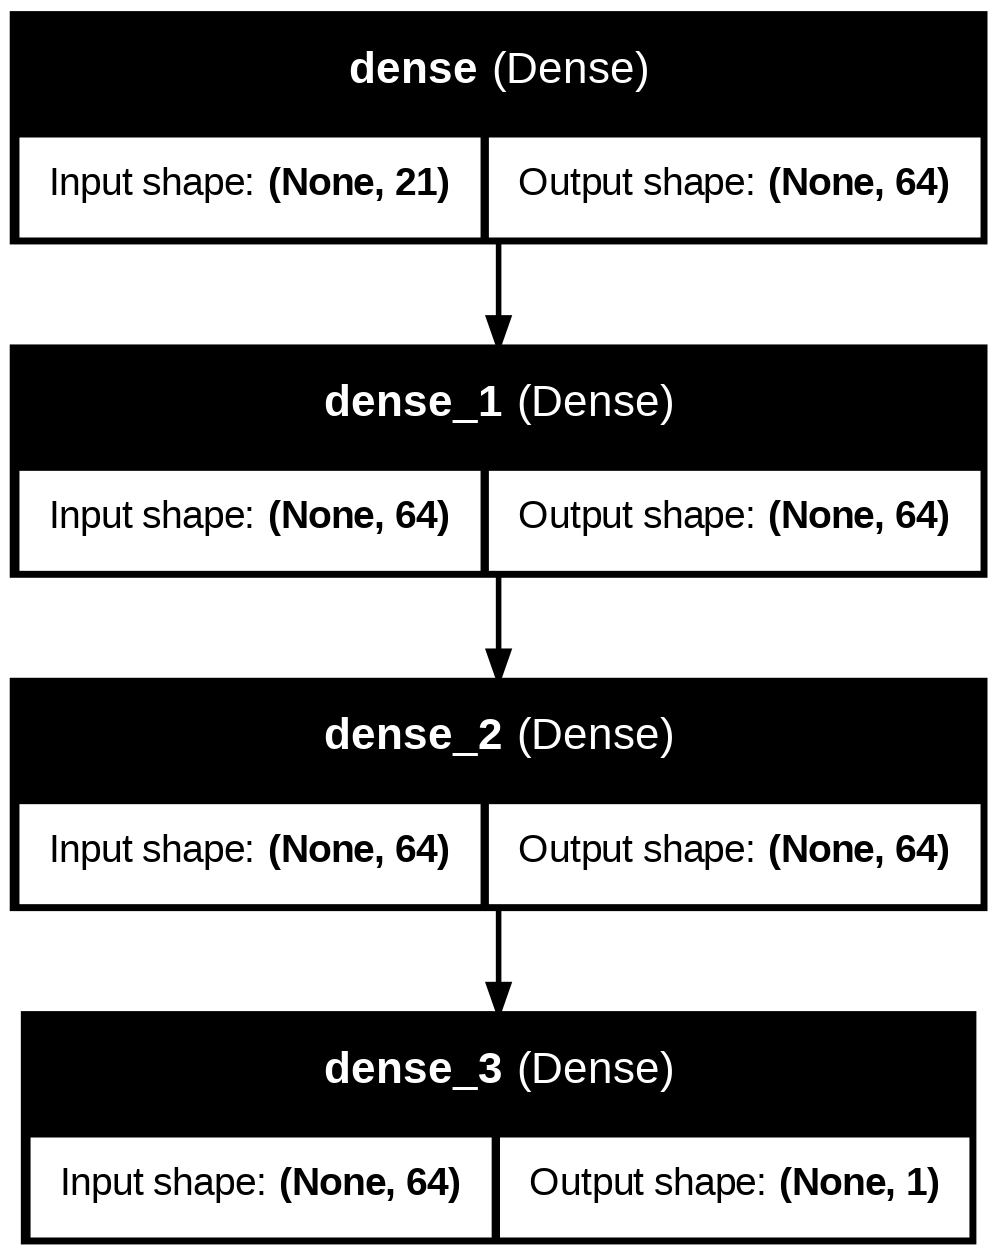

In [42]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model Fitting

In [43]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4323.3301 - mean_absolute_error: 64.5010 - mean_squared_error: 4323.3301 - val_loss: 190.0796 - val_mean_absolute_error: 11.4184 - val_mean_squared_error: 190.0796
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205.3016 - mean_absolute_error: 11.1857 - mean_squared_error: 205.3016 - val_loss: 98.8521 - val_mean_absolute_error: 8.1464 - val_mean_squared_error: 98.8521
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.7258 - mean_absolute_error: 7.5701 - mean_squared_error: 88.7258 - val_loss: 77.3464 - val_mean_absolute_error: 7.2062 - val_mean_squared_error: 77.3464
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.0082 - mean_absolute_error: 6.8498 - mean_squared_error: 74.0082 - val_loss: 67.9228 - val_mean_absolute_error: 6.6821 - val_mean_squared_error: 67.9228
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.9225 - mean_absolute_error: 6.4636 - mean_squared_error: 64.9225 -

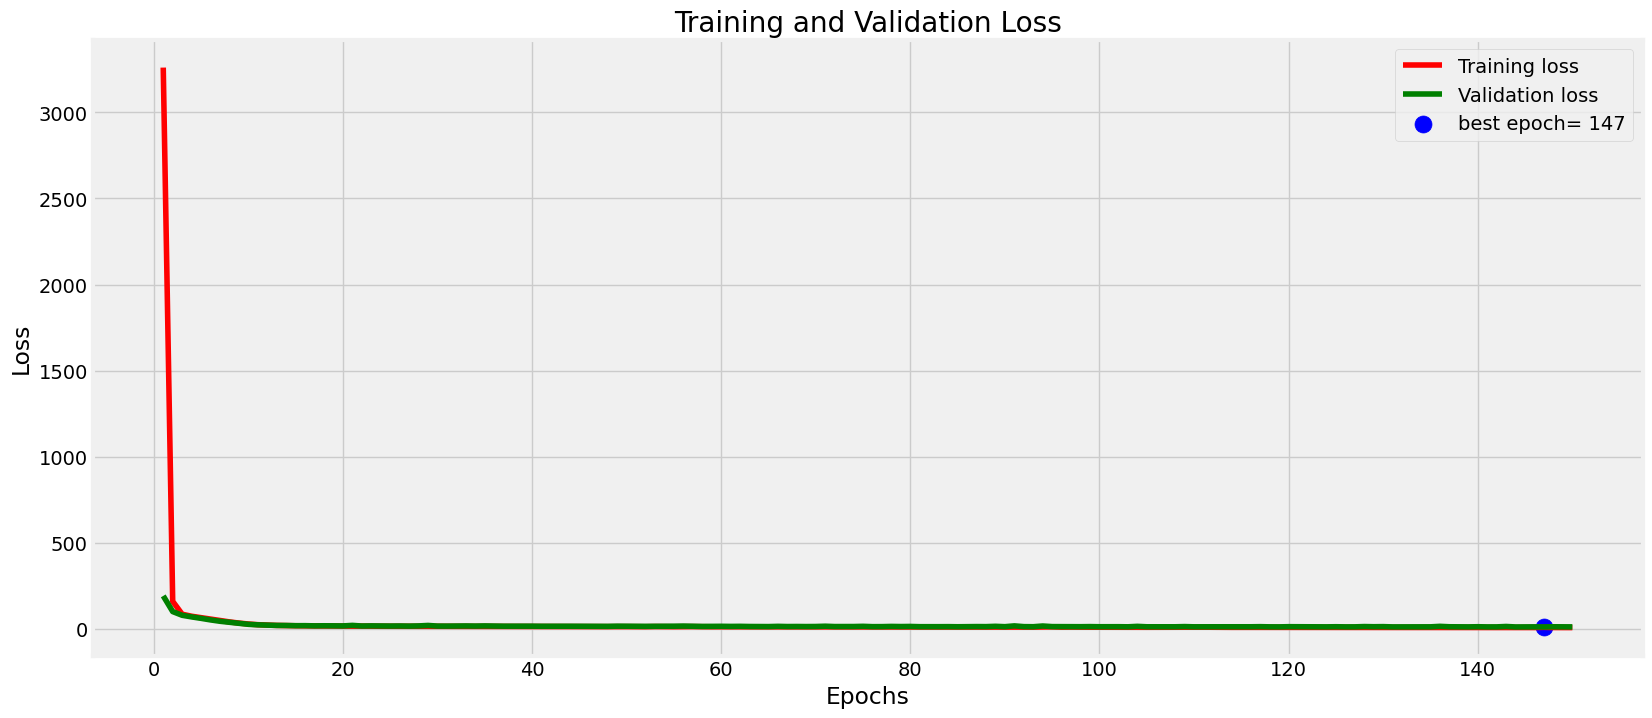

In [44]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [45]:
#metrics=['mean_absolute_error','mean_squared_error']

mae = history.history['mean_absolute_error']

acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Mean Absolute error','Loss'])

,Mean Absolute error,Loss,Epoch
0,53.561596,3260.940430,1
1,9.746511,158.331772,2
2,7.331122,83.593674,3
3,6.775657,71.801147,4
4,6.403887,63.652580,5
5,5.934425,54.909657,6
6,5.485146,47.005871,7
7,4.953452,38.852867,8
8,4.472021,32.123180,9
9,4.032343,26.648493,10


Prediction

In [46]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [47]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9054411790767896
